# 1. Membaca Dataset

In [4]:
# Mengimport library pandas untuk membaca dataset
import pandas as pd

# baca dataset csv menggunakan syntax pd.read_csv()
df = pd.read_csv('/content/admission_data.csv')

In [5]:
data

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0
...,...,...,...,...,...,...,...,...
500,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
501,328.0,108.0,4.0,4.5,4.0,9.18,yes,1
502,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
503,325.0,106.0,3.0,3.5,4.0,8.40,yes,0


# 2. Ringkasan Data

`info()` : berguna untuk memahami dengan cepat struktur dan konten DataFrame, membantu dalam eksplorasi dan persiapan data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                496 non-null    float64
 1   toefl_score              497 non-null    float64
 2   univ_ranking             498 non-null    float64
 3   motiv_letter_strength    503 non-null    float64
 4   recommendation_strength  499 non-null    float64
 5   gpa                      501 non-null    float64
 6   research_exp             505 non-null    object 
 7   admit_status             505 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 31.7+ KB


# 3. Mengecek Data yang Hilang (Missing Value)

In [7]:
# mengecek missing value
df.isna().sum()

,0
gre_score,9
toefl_score,8
univ_ranking,7
motiv_letter_strength,2
recommendation_strength,6
gpa,4
research_exp,0
admit_status,0


**Observasi:**

Dari informasi yang kita dapatkan pada data terdapat beberapa data yang hilang pada kolom `gre_score`, `toefl_score`, `univ_ranking`, `motiv_letter_strength`, `recommendation_strength`, dan `gpa`

In [8]:
# cek statiscial summary
df.describe()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,admit_status
count,496.000000,497.000000,498.000000,503.000000,499.000000,501.000000,505.000000
mean,316.491935,107.173038,3.130522,3.382704,3.484970,8.574571,0.574257
std,11.218848,6.024667,1.135238,0.985532,0.925582,0.600892,0.494945
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [9]:
# cek statiscial summary
df['research_exp'].describe()

,research_exp
count,505
unique,2
top,yes
freq,280


**Observasi:**
* Secara keseluruhan, nilai minimum dan maksimum masuk akal untuk setiap kolom
* _Mean ~ 50% (Median)_ di kolom `gre_score`, `toefl_score`, dan `gpa`, menunjukkan distribusi normal
* Kolom `admit_status` adalah kolom boolean/biner karena nilainya 0 atau 1, tidak perlu menyimpulkan kesimetrisannya. Hanya perlu memeriksa *balance level*
* `univ_ranking`, `motiv_letter_strength`, dan `recommendation_strength` adalah nilai-nilai diskrit dengan jumlah nilai unik yang tidak banyak, distribusi nilai perlu diperiksa kemudian.

In [10]:
# Mengatasi missing value
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Jika kolom bertipe numerik, isi dengan mean
        df[column].fillna(df[column].mean(), inplace=True)

/tmp/ipython-input-10-3213337050.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipython-input-10-3213337050.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [11]:
# cek kembali missing value
df.isna().sum()

,0
gre_score,0
toefl_score,0
univ_ranking,0
motiv_letter_strength,0
recommendation_strength,0
gpa,0
research_exp,0
admit_status,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                505 non-null    float64
 1   toefl_score              505 non-null    float64
 2   univ_ranking             505 non-null    float64
 3   motiv_letter_strength    505 non-null    float64
 4   recommendation_strength  505 non-null    float64
 5   gpa                      505 non-null    float64
 6   research_exp             505 non-null    object 
 7   admit_status             505 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 31.7+ KB


# 4. Mengatasi Duplikat Data

In [13]:
# Mengecek apakah ada duplicate di seluruh kolom
check_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 5


In [14]:
# Handling duplicate
df = df.drop_duplicates()

In [15]:
# Mengecek duplicate setelah di-handle
handle_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {handle_duplicate}")

Jumlah data yang duplikat = 0


```
Yeayyy!!! Kita berhasil mengatasi duplikat data 😀
```

# **5. Create Your Portfolio**

Rincian Tugas:
1. Carilah sebuah dataset (dari kaggle ataupun website lainnya)
2. Lakukan Exploratory Data Analysis pada dataset tersebut.
  - EDA yang dilakukan WAJIB melakukan `Handling Missing Value dan Duplicate`
  - Proses EDA yang lain bersifat opsional (e.g. *handling outlier*, *encoding*)
3. Buat portfolio dalam bentuk Power Point
4. Upload di LinkedIn dan tag dibimbing.id

In [16]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 2. Load dataset
df = pd.read_csv('/content/netflix_titles.csv')

In [19]:
# 3. Lihat 5 data teratas
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
# 4. Cek informasi umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [21]:
# 5. Cek missing values
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [25]:
# ===== Mengatasi Missing Value pada Dataset Netflix =====

  # 1. Kolom 'director', 'cast', dan 'country' bertipe teks, dan tidak selalu wajib diisi
  #    Solusi: Isi dengan 'Unknown' agar tetap informatif tanpa menghapus baris
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

  # 2. Kolom 'date_added' menyimpan tanggal kapan tayangan ditambahkan ke Netflix
  #    Solusi: Diisi dengan nilai modus (tanggal yang paling sering muncul)
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

  # 3. Kolom 'rating' menyimpan klasifikasi umur (seperti TV-MA, PG, dll)
  #    Solusi: Karena rating bersifat kategorikal, diisi dengan modus
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

  # 4. Kolom 'duration' bisa berupa "90 min" (untuk film) atau "1 Season" (untuk TV Show)
  #    Solusi: Diisi dengan modus agar tetap relevan dan tidak bias
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [26]:
# Cek ulang untuk memastikan semua sudah di-handle
print("Cek missing value setelah pembersihan:")
print(df.isnull().sum())

Cek missing value setelah pembersihan:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [31]:
# 6. Cek duplicate
print("\nJumlah data duplikat:")
print(df.duplicated().sum())
print("")
print(df.duplicated())



Jumlah data duplikat:
0

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool


In [32]:
# 7. Drop duplicate
df = df.drop_duplicates()

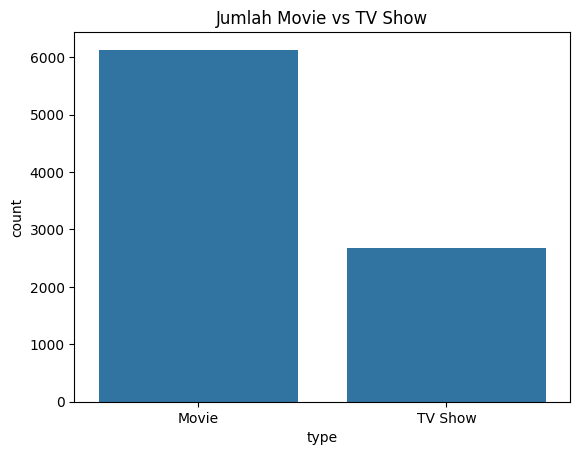

In [33]:
# 8. Visualisasi jumlah konten berdasarkan jenis
sns.countplot(data=df, x='type')
plt.title('Jumlah Movie vs TV Show')
plt.show()

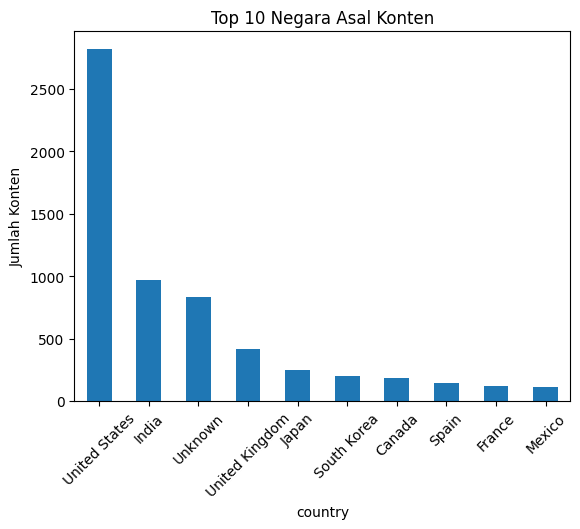

In [34]:
# 9. Visualisasi top 10 negara dengan konten terbanyak
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Negara Asal Konten')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)
plt.show()

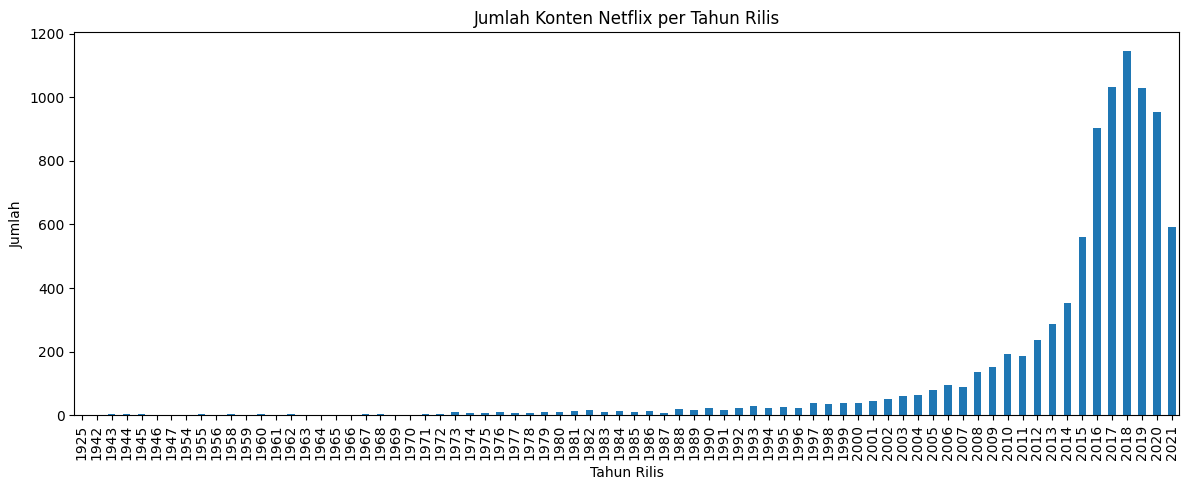

In [35]:
# 10. Jumlah konten tiap tahun rilis
plt.figure(figsize=(12,5))
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Jumlah Konten Netflix per Tahun Rilis')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

/tmp/ipython-input-39-1273370358.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


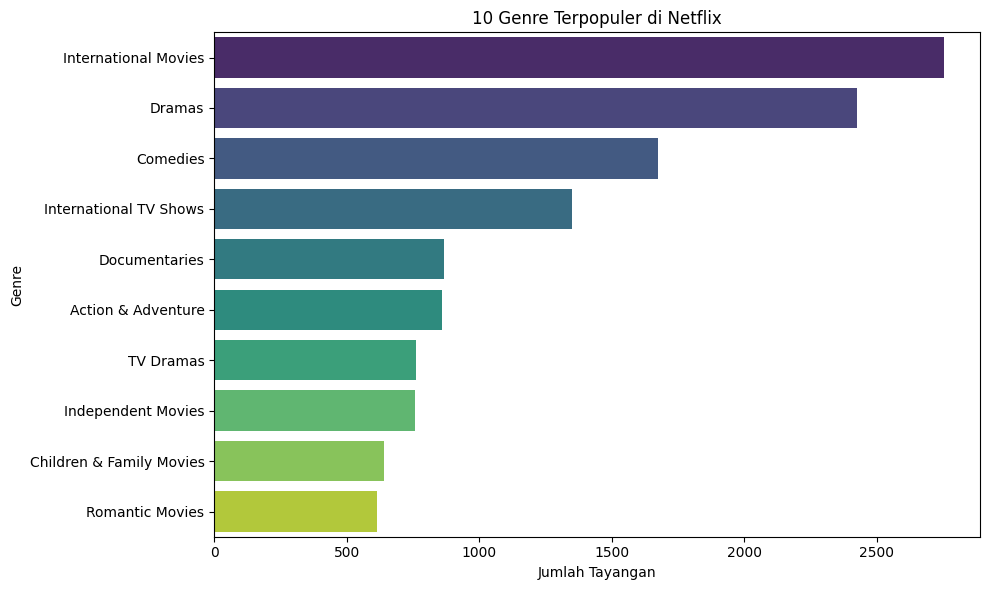

In [39]:
#11. Distribusi Genre – Visualisasi Top 10 Genre

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pecah string genre jadi list
all_genres = df['listed_in'].dropna().str.split(', ')

# Hitung total genre
genre_count = Counter([genre for sublist in all_genres for genre in sublist])

# Ubah ke DataFrame
genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Jumlah']).sort_values(by='Jumlah', ascending=False)

# Barplot top 10 genre (fix warning)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=genre_df.head(10),
    x='Jumlah',
    y='Genre',
    hue=None,              # FIX untuk seaborn >= 0.14.0
    legend=False,
    palette='viridis'
)
plt.title('10 Genre Terpopuler di Netflix')
plt.xlabel('Jumlah Tayangan')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

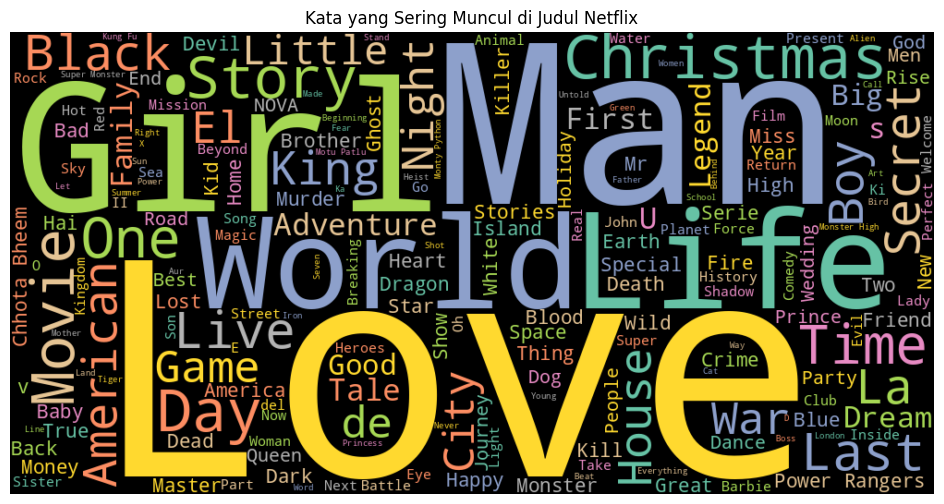

In [42]:
#12. Word Cloud untuk Judul Film / TV Show

from wordcloud import WordCloud

# Gabungkan semua judul menjadi satu string
text = ' '.join(df['title'].dropna())

# Buat word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='Set2').generate(text)

# Tampilkan word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata yang Sering Muncul di Judul Netflix')
plt.show()

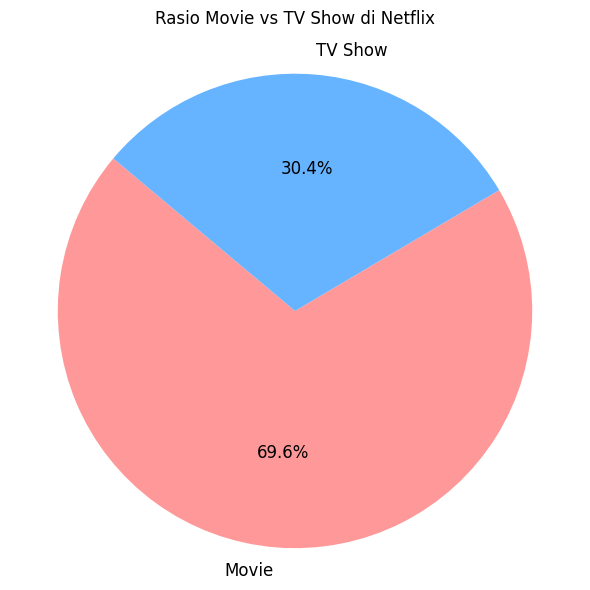

In [44]:
#13. Rasio Movie vs TV Show – Pie Chart

# Ambil data
labels = df['type'].value_counts().index
sizes = df['type'].value_counts().values
colors = ['#ff9999','#66b3ff']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 12})
plt.title('Rasio Movie vs TV Show di Netflix', pad=20)
plt.axis('equal')  # Biar pie-nya lingkaran sempurna
plt.tight_layout()
plt.show()